In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.feature_selection import RFECV, SelectFromModel, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
%matplotlib inline

In [3]:
japan = pd.read_csv('JAPAN.csv', index_col=0)
canada = pd.read_csv('CANADA.csv', index_col=0)
france = pd.read_csv('FRANCE.csv', index_col=0)
italy = pd.read_csv('ITALY.csv', index_col=0)
uk = pd.read_csv('UK.csv', index_col=0)
us = pd.read_csv('US.csv', index_col=0)
germany = pd.read_csv('GERMANY.csv', index_col=0)

df_Stock = canada
df_Stock = df_Stock.rename(columns={'Close(t)':'Close'})
df_Stock.head()

,Close,Net Chg,Open,High,Low,Tick Count
Time Interval,,,,,,
Summary,17543.43,444.87,17052.42,17970.51,11172.73,410634
09:30 - 10:00,17060.03,-38.53,17052.42,17072.94,17040.66,120
10:00 - 10:30,17053.58,-6.45,17061.03,17062.82,17045.41,120
10:30 - 11:00,17034.19,-19.39,17050.74,17050.74,17028.16,120
11:00 - 11:30,17041.99,7.80,17034.43,17044.66,17033.97,120


In [4]:
df_Stock.tail(5)

,Close,Net Chg,Open,High,Low,Tick Count
Time Interval,,,,,,
14:00 - 14:30,17548.68,-17.16,17564.21,17564.38,17543.66,120
14:30 - 15:00,17558.40,9.72,17548.11,17559.83,17543.51,120
15:00 - 15:30,17565.38,6.98,17558.57,17569.89,17553.64,120
15:30 - 16:00,17545.49,-19.89,17564.94,17567.07,17543.59,120
16:00 - 16:30,17543.43,-2.06,17543.43,17543.43,17543.43,81


In [5]:
df_Stock.shape

(3508, 6)

In [6]:
df_Stock.columns

Index(['Close', 'Net Chg', 'Open', 'High', 'Low', 'Tick Count'], dtype='object')

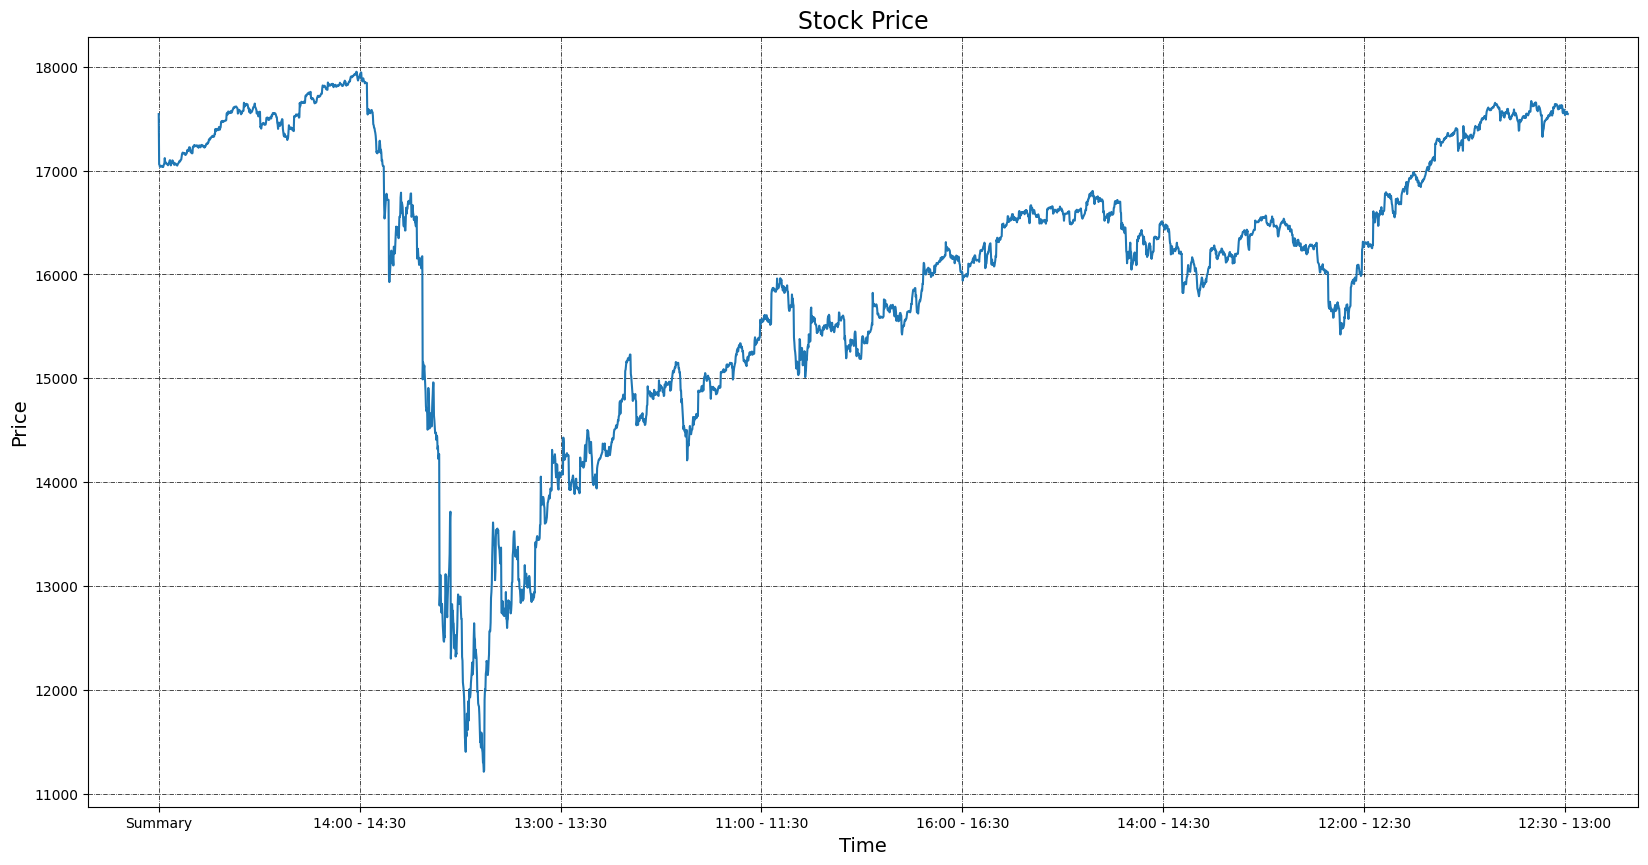

In [7]:
df_Stock['Close'].plot(figsize=(20, 10))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [8]:
def create_train_test_set(df_Stock):

 features = df_Stock.drop(columns=['Close'], axis=1)
 target = df_Stock['Close']

 data_len = df_Stock.shape[0]
 print('Historical Stock Data length is - ', str(data_len))
 #create a chronological split for train and testing
 train_split = int(data_len * 0.70)
 print('Training Set length - ', str(train_split))
 val_split = train_split + int(data_len * 0.1)
 print('Validation Set length - ', str(int(data_len * 0.3)))

 print('Test Set length - ', str(int(data_len * 0.3)))
 # Splitting features and target into train, validation and test samples
 X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
 Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

 #print shape of samples
 print(X_train.shape, X_val.shape, X_test.shape)
 print(Y_train.shape, Y_val.shape, Y_test.shape)

 return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [9]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

Historical Stock Data length is -  3508
Training Set length -  2455
Validation Set length -  1052
Test Set length -  1052
(2455, 5) (350, 5) (703, 5)
(2455,) (350,) (703,)


In [10]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [11]:
print('LR Coefficients: \n', lr.coef_)
print('LR Intercept: \n', lr.intercept_)

LR Coefficients: 
 [ 0.09247909 -0.38035662  0.76477637  0.61683257  0.00822284]
LR Intercept: 
 -23.463504896719314


In [12]:
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.9997848866683156


In [13]:
def get_mape(y_true, y_pred):
 """
 Compute mean absolute percentage error (MAPE)
 """
 y_true, y_pred = np.array(y_true), np.array(y_pred)
 return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [14]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [15]:
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),2))
print("Training Explained Variation: ",round(metrics.explained_variance_score(Y_train,Y_train_pred),2))
print('Training MAPE:', round(get_mape(Y_train,Y_train_pred), 2))
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))
print("Training MAE: ",round(metrics.mean_absolute_error(Y_train,Y_train_pred),2))
print(' ')
print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),2))
print("Validation Explained Variation: ",round(metrics.explained_variance_score(Y_val,Y_val_pred),2))
print('Validation MAPE:', round(get_mape(Y_val,Y_val_pred), 2))
print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2))
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))
print("Validation MAE: ",round(metrics.mean_absolute_error(Y_val,Y_val_pred),2))
print(' ')
print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),2))
print("Test Explained Variation: ",round(metrics.explained_variance_score(Y_test,Y_test_pred),2))
print('Test MAPE:', round(get_mape(Y_test,Y_test_pred), 2))
print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2))
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))
print("Test MAE: ",round(metrics.mean_absolute_error(Y_test,Y_test_pred),2))

Training R-squared:  1.0
Training Explained Variation:  1.0
Training MAPE: 0.08
Training Mean Squared Error: 466.27
Training RMSE:  21.59
Training MAE:  12.09
 
Validation R-squared:  1.0
Validation Explained Variation:  1.0
Validation MAPE: 0.06
Validation Mean Squared Error: 466.27
Validation RMSE:  13.38
Validation MAE:  9.27
 
Test R-squared:  1.0
Test Explained Variation:  1.0
Test MAPE: 0.05
Test Mean Squared Error: 131.01
Test RMSE:  11.45
Test MAE:  7.78


In [16]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
df_pred = df_pred.reset_index()
df_pred

,Time Interval,Actual,Predicted
0,12:30 - 13:00,16311.31,16300.652282
1,13:00 - 13:30,16306.20,16318.829235
2,13:30 - 14:00,16282.74,16298.650833
3,14:00 - 14:30,16189.60,16226.462489
4,14:30 - 15:00,16232.21,16222.115566
...,...,...,...
345,10:00 - 10:30,16536.52,16534.371483
346,10:30 - 11:00,16526.61,16537.726632
347,11:00 - 11:30,16491.09,16497.427430
348,11:30 - 12:00,16502.61,16494.819742


<Axes: >

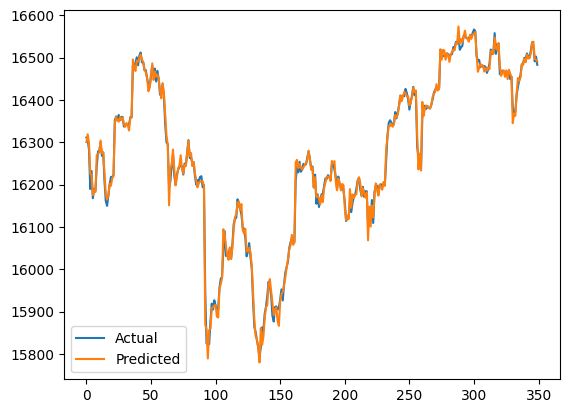

In [17]:
df_pred[['Actual', 'Predicted']].plot()